Subsection for density matrix stuff
31/01/23

- Moved here from tensor formalism page to try and fix rendering issues. Also added setup stuff to replicate basis sets in that notebook. UPDATE: currently is working in HTML, but sometimes a bit flaky and appears/disappears on reload - issues with pulling display scripts?

- Also promoted to top-level section (not nested under tensor stuff) for generality.

- For additional rendering tests, see http://jake:9966/lab/tree/QM3/doc-source/tests/holoviews_render_tests_310123.ipynb

- Working from Density matrix ePSproc notes, http://jake:9966/lab/tree/code-share/github-share/ePSproc/docs/doc-source/methods/density_mat_notes_demo_300821.ipynb and MF recon article notes (Tex, and http://jake/jupyter/user/paul/doc/tree/code-share/stimpy-docker-local/MFPADs_recon_manuscript_dev_April_2022/MFrecon_manuscript_fig_generation_170422-Stimpy_MAIN-oldPkgs.ipynb, basis of demo code herein)

30/01/23 extended with notes from MF recon article.

10/02/23 added general intro & tidying up. Fixed some notation (may still need some work, and/or adding to photoionization intro part), and fidelity part. TODO: check numerics with noise make sense there.

19/07/23 reviewing with minor mods.

- Issue with sym setup script? Throwing some errors.
  - Now tidied in script (not required here), but should debug.
- Text OK and tidied up a bit, still some debug stuff to remove.
- Spit to full and noQutip versions for build testing.

TODO:

- More on irreducible tensors vs. density mat? See Blum Chpt. 4 and Zare, also previous notes. SHould be able to add some theory and numerics here, maybe a subsection for this? Feels like there might be some interesting relations here...
   - L,M representation and diagonality? See p135 - although maybe obvious?
   - Rotation properties and complete basis, symmetries.
   - Sect 4.6.5 for spatial properties
   - Sect 4.8 for notation and conventions
   - Subspace projections as summations, reduced density matrices, p64
- Floor noise example to zero? Should be more physical than having -ve values allowed?
- See QuTip for more stuff, e.g. entropy and distance metrics, https://qutip.org/docs/latest/apidoc/functions.html#module-qutip.metrics. Should be able to use directly on numerical matrices?

(sec:density-mat-basic)=
# Density matrix representation

(sec:density-mat-intro)=
## General introduction

For a general introduction, and discussion of density matrix techniques and applications in AMO physics, see Blum's textbook _Density Matrix Theory and Applications_ {cite}`BlumDensityMat`, which is referred to extensively herein. The general density operator, for a mixture of independent states $|\psi_{n}\rangle$, can be defined as per Eqn. 2.8 in Blum {cite}`BlumDensityMat`:

$$
\hat{\rho}=\sum_{n}W_{n}|\psi_{n}\rangle\langle\psi_{n}|
$$

Where $W_{n}$ defines the (statistical) weighting of each state $\psi_{n}$ in the mixture.

% Removed \boldsymbol{\rho} due to HTML rendering issues.

For a given basis set, $|\phi_{m}\rangle$, the states can be expanded and the matrix elements of $\rho$ defined as per Eqns. 2.9 - 2.11 in Blum {cite}`BlumDensityMat`:

$$
| \psi_{n} \rangle = \sum_{m'} a_{m'}^{(n)}| \phi_{m'}\rangle
$$

$$
\hat{\rho}=\sum_{n}\sum_{mm'}W_{n}a_{m'}^{(n)}a_{m}^{(n)*}|\phi_{m'}\rangle\langle\phi_{m}|
$$  (eqn:density-mat-outer-prod)

And the matrix elements - _the density matrix_ - given explicitly as:

$$
\rho_{i,j}=\langle\phi_{i}|\hat{\rho}|\phi_{j}\rangle=\sum_{n}W_{n}a_{i}^{(n)}a_{j}^{(n)*}
$$ (eqn:density-mat-generic)

For all pairs of basis states $(i,j)$. This defines the density matrix in the $\{|\phi_n\rangle\}$ _representation_ (basis space). Of particular note here is that the mixed states are assumed to be incoherent (independent), whilst the basis expansion is coherent. 


% [^blumFootnote]: For general discussion of density matrix techniques and applications in AMO physics, see Blum's textbook _Density Matrix Theory and Applications_ {cite}`BlumDensityMat`, which is referred to extensively herein.

% TODO: numerical examples here
% TODO: decide on notation, \Psi_c == \mathbf{k}?
% 30/01/23 extended with notes from MF recon article.
% 10/02/23 added general intro & tidying up

(sec:density-mat-intro:continuum)=
## Continuum density matrices

% May want to move to Sect. 3.2 and add some more details?
In general, the discussion herein will focus on the photoelectron properties and generally assume a single final ion, and associated free-electron state of interest, hence the final state (Eq. {eq}`eq:continuum-state-vec`) can be simplified to $|\Psi_f\rangle\equiv|\mathbf{k}\rangle$. This is equivalent to a "pure state" in density matrix terminology, which can then expanded (coherently) in an appropriate representation (basis). Following this, the density operator associated with the continuum state can be written as $\hat{\rho}=|\Psi_f\rangle\langle\Psi_f|\equiv|\mathbf{k}\rangle\langle\mathbf{k}|$. Making use of the tensor notation introduced in {numref}`Sect. %s <sec:tensor-formulation>`, the final continuum state can then be expanded as a density matrix in the $\zeta\zeta'$ representation (with the observable dimensions $\{L,M\}$ explicitly included in the density matrix), which will also be dependent on the choice of {{ GAMMACHANNEL }} (hence "experiment" $u$); the density matrix can then be given as:

$$
{\rho}_{L,M}^{u,\zeta\zeta'}=\varUpsilon_{L,M}^{u,\zeta\zeta'}\mathbb{I}^{\zeta,\zeta'}
$$ (eqn:full-density-mat)

Here the density matrix can be interpreted as the final, {{ LF }}/{{ AF }} or {{ MF }} density matrix (depending on the {{ GAMMACHANNEL }} used), incorporating both the intrinsic and extrinsic effects (i.e. all channel couplings and radial matrix elements for the given measurement), with dimensions dependent on the unique sets of quantum numbers required - in the simplest case, this will just be a set of partial waves $\zeta = \{l,m\}$. 

In the channel function basis, a radial, or reduced, form of the density matrix can also be constructed, and is given by the coherent product of the radial matrix elements (as defined in Eq. {eq}`eqn:I-zeta`):

% Safe version - no bold
$$
\rho^{\zeta\zeta'} = \mathbb{I}^{\zeta,\zeta'}
$$ (eqn:radial-density-mat)

This form encodes purely intrinsic (molecular scattering) photoionization dynamics (thus characterises the scattering event), whilst the full form ${\rho}_{L,M}^{u,\zeta\zeta'}$ of Eq. {eq}`eqn:full-density-mat` includes any additional effects incorporated via the channel functions. For reconstruction problems, it is usually the reduced form of Eq. {eq}`eqn:radial-density-mat` that is of interest, since the remainder of the problem is already described analytically by the {{ GAMMACHANNEL }} $\varUpsilon_{L,M}^{u,\zeta\zeta'}$. In other words, the retrieval of the radial matrix elements $\mathbb{I}^{\zeta,\zeta'}$ and the radial density matrix $\rho^{\zeta\zeta'}$ are equivalent, and both can be viewed as completely describing the photoionization dynamics.

The $L,M$ notation for the full density matrix ${\rho}_{L,M}^{u,\zeta\zeta'}$ (Eq. {eq}`eqn:full-density-mat`) indicates here that these dimensions should not be summed over, hence the tensor coupling into the $\beta_{L,M}^{u}$ parameters can also be written directly in terms of the density matrix (cf. Eq. {eq}`eqn:channel-fns`):

$$
\beta_{L,M}^{u}=\sum_{\zeta,\zeta'}{\rho}_{L,M}^{u,\zeta\zeta'}
$$ (eqn:beta-density-mat)

In fact, this form arises naturally since the $\beta_{L,M}^{u}$ terms are the state multipoles (geometric tensors) defining the system, which can be thought of as a coupled basis equivalent of the density matrix representations (see, e.g., Ref. {cite}`BlumDensityMat`, Chpt. 4.).

In a more traditional notation (following Eq. {eq}`eq:continuum-state-vec`, see also Ref. {cite}`gregory2022LaboratoryFrameDensitya`), the density operator can be expressed as:

$$
\rho(t) =\sum_{LM}\sum_{KQS}A^{K}_{QS}(t)\sum_{\zeta\zeta^{\prime}}\varUpsilon_{L,M}^{u,\zeta\zeta'}|\zeta,\Psi_+\rangle\langle\zeta,\Psi_+|\mu_q\rho_i\mu_{q\prime}^{*}|\zeta^{\prime},\Psi_+\rangle\langle\zeta^{\prime},\Psi_+|
$$ (eqn:full-density-mat-traditional)

This is, effectively, equivalent to an expansion in the various tensor operators defined in the channel function notation above (Eq. {eq}`eqn:full-density-mat`), but in a standard state-vector notation. Note, also, that this form explicitly defines the initial state of the system as a density matrix $\rho_i = |\Psi_i\rangle\langle\Psi_i|$, and explicitly allows for time-dependence via the {{ ADMsymbol }} term. (For further discussion of the use of density matrices in other specific cases, see {{ QM1 }}, particularly Chpts. 2 & 3, and refs. therein.)

The main benefit of a (continuum) density matrix representation in the current work is as a rapid way to visualize the phase relations between the photoionization matrix elements (the off-diagonal density matrix elements), and the ability to quickly check the overall pattern of the elements, hence confirm that no phase-relations are missing and orthogonality relations are fulfilled - some numerical examples are given below. Since the method for computing the density matrices is also numerically equivalent to a tensor outer-product, density matrices and visualizations can also be rapidly composed for other properties of interest, e.g. the various {{ GAMMACHANNEL }} defined herein, providing another complementary methodology and tool for investigation. (Further examples can be found in the {{ ePSproc_docs }}, as well as in the literature, see, e.g., Ref. {cite}`BlumDensityMat` for general discussion, Ref. {cite}`Reid1991` for application in pump-probe schemes.) 

Furthermore, as noted above, the density matrix elements provide a complete description of the photoionization event, and hence make clear the equivalence of the "complete" photoionization experiments (and associated continuum reconstruction methods) discussed herein, with general quantum tomography schemes {cite}`MauroDAriano2003`. The density matrix can also be used as the starting point for further analysis based on standard density matrix techniques - this is discussed, for instance, in Ref. {cite}`BlumDensityMat`, and can also be viewed as a bridge between traditional methods in spectroscopy and AMO physics, and more recent concepts in the quantum information sciences (see, e.g., Refs. {cite}`Tichy2011a,Yuen-Zhou2014` for recent discussions in this context). A brief numerical diversion in this direction is given in {numref}`Sect. %s <sect:theory:denmat:qutip>`, which illustrates the use of the {{ qutipFull }} with the density matrix results derived herein.

## Numerical setup

This follows the setup in {numref}`Sect. %s <sec:tensor-formulation>` {ref}`sec:tensor-formulation`, using a symmetry-based set of basis functions for demonstration purposes. (Repeated code is hidden in PDF version.)

In [1]:
# Run default config - may need to set full path here
%run '../scripts/setup_notebook.py'

# Override plotters backend?
# plotBackend = 'pl'

*** Setting up notebook with standard Quantum Metrology Vol. 3 imports...
For more details see https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_basic_demo_030621-full.html
To use local source code, pass the parent path to this script at run time, e.g. "setup_fit_demo ~/github"

*** Running: 2023-07-27 10:58:03
Working dir: /home/jovyan/QM3/doc-source/part1
Build env: notebook

* Loading packages...


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 


* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.


* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 


* Set Holoviews with bokeh.
Jupyter Book      : 0.15.1
External ToC      : 0.3.1
MyST-Parser       : 0.18.1
MyST-NB           : 0.17.2
Sphinx Book Theme : 1.0.1
Jupyter-Cache     : 0.6.1
NbClient          : 0.7.4


In [2]:
# Setup symmetry-defined matrix elements using PEMtk

%run '../scripts/setup_symmetry_basis_tensors.py'

*** Setting up basis set for symmetry-defined matrix elements, see Quantum Metrology Vol. 3 Sect. 3.3...

Set symmetry=D2h, lmax=4
*** Mapping coeffs to ePSproc dataType = matE
Remapped dims: {'C': 'Cont', 'mu': 'it'}
Added dim Eke
Added dim Targ
Added dim Total
Added dim mu
Added dim Type
Found dipole symmetries: 
{'B1u': {'m': [0], 'pol': ['z']}, 'B2u': {'m': [-1, 1], 'pol': ['y']}, 'B3u': {'m': [-1, 1], 'pol': ['x']}}
*** Mapping coeffs to ePSproc dataType = BLM
Remapped dims: {'C': 'Cont', 'mu': 'muX'}
Added dim Eke
Added dim P
Added dim T
Added dim C
*** Mapping coeffs to ePSproc dataType = matE
Remapped dims: {'C': 'Cont', 'mu': 'muX'}
Added dim Eke
Added dim Targ
Added dim Total
Added dim mu
Added dim it
Added dim Type
*** Assigning matrix elements and computing betas...
Set channels neutral sym=A1g, ion sym=A1g


/home/jovyan/github/PEMtk/pemtk/sym/_dipoleTerms.py:102: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (col, vals) in dipolePD.iteritems():


*** Updated self.coeffs['matE'] with new coords.
Assigned 'Total' from A1g x A1g = ['A1g']
Assigned 'Total' from A1g x A1u = ['A1u']
Assigned 'Total' from A1g x B1g = ['B1g']
Assigned 'Total' from A1g x B1u = ['B1u']
Assigned 'Total' from A1g x B2g = ['B2g']
Assigned 'Total' from A1g x B2u = ['B2u']
Assigned 'Total' from A1g x B3g = ['B3g']
Assigned 'Total' from A1g x B3u = ['B3u']
*** Updated self.coeffs['matE'] with new coords.
Assigned dipole-allowed terms for dim = 'Cont' to self.coeffs['symAllowed']


Cont                                                       B1u  \
Eke Targ Total Type h it  l m  mu muX                            
0   A1g  B1u   U    0 NaN 1  0  0 0                     (1+0j)   
                    1 NaN 3  0  0 0                     (1+0j)   
                    2 NaN 3 -2  0 0    (0.7071067811865475+0j)   
                             2  0 0    (0.7071067811865475+0j)   
         B2u   U    0 NaN 1 -1 -1 0                              
                                1 0                              
                             1 -1 0                              
                                1 0                              
                    1 NaN 3 -3 -1 0                              
                                1 0                              
                             3 -1 0                              
                                1 0                              
                    2 NaN 3 -1 -1 0                              
                                1 0                              
                             1 -1 0                              
                                1 0                              
         B3u   U    0 NaN 1 -1 -1 0                              
                                1 0                              
                             1 -1 0                              
                                1 0                              
                    1 NaN 3 -1 -1 0                              
                                1 0                              
                             1 -1 0                              
                                1 0                              
                    2 NaN 3 -3 -1 0                              
                                1 0                              
                             3 -1 0                              
                                1 0                              

Cont                                                        B2u  \
Eke Targ Total Type h it  l m  mu muX                             
0   A1g  B1u   U    0 NaN 1  0  0 0                               
                    1 NaN 3  0  0 0                               
                    2 NaN 3 -2  0 0                               
                             2  0 0                               
         B2u   U    0 NaN 1 -1 -1 0    (-0.7071067811865475+0j)   
                                1 0    (-0.7071067811865475+0j)   
                             1 -1 0    (-0.7071067811865475-0j)   
                                1 0    (-0.7071067811865475-0j)   
                    1 NaN 3 -3 -1 0    (-0.7071067811865475+0j)   
                                1 0    (-0.7071067811865475+0j)   
                             3 -1 0    (-0.7071067811865475-0j)   
                                1 0    (-0.7071067811865475-0j)   
                    2 NaN 3 -1 -1 0    (-0.7071067811865475+0j)   
                                1 0    (-0.7071067811865475+0j)   
                             1 -1 0    (-0.7071067811865475-0j)   
                                1 0    (-0.7071067811865475-0j)   
         B3u   U    0 NaN 1 -1 -1 0                               
                                1 0                               
                             1 -1 0                               
                                1 0                               
                    1 NaN 3 -1 -1 0                               
                                1 0                               
                             1 -1 0                               
                                1 0                               
                    2 NaN 3 -3 -1 0                               
                                1 0                               
                             3 -1 0                               
                                1 0                               

Cont    

Product basis elements: dict_keys(['BLMtableResort', 'polProd', 'phaseConvention', 'BLMRenorm'])
Full basis elements: dict_keys(['QNs', 'EPRX', 'lambdaTerm', 'BLMtable', 'BLMtableResort', 'AFterm', 'AKQS', 'polProd', 'phaseConvention', 'BLMRenorm', 'matEmult'])

*** Setting trial results for linear ramp ADMs.
Subselected from dataset 'ADM', dataType 'ADM': 50 from 50 points (100.00%)
Computing BLMs for linear ramp case...


In [3]:
# 19/07/23 - this needs debugging, but skipped for now!
# Not sure what has changed - might be issue with dim names?
# ep.geomFunc.afblmXprod(data.data[data.subKey]['matE'], basisReturn = 'Full', selDims={}, sqThres=False)

In [4]:
# Now run in script above

# # Setup symmetry-defined matrix elements using PEMtk

# # Import class
# from pemtk.sym.symHarm import symHarm

# # Compute hamronics for Td, lmax=4
# sym = 'D2h'
# lmax=4

# lmaxPlot = 2  # Set lmaxPlot for subselection on plots later.

# # TODO: consider different labelling here, can set at init e.g. dims = ['C', 'h', 'muX', 'l', 'm'] - 25/11/22 code currently fails for mu mapping, remap below instead
# symObj = symHarm(sym,lmax)
# # symObj = symHarm(sym,lmax,dims = ['Cont', 'h', 'muX', 'l', 'm'])

# # To plot using ePSproc/PEMtk class, these values can be converted to ePSproc BLM data type...

# # Run conversion - the default is to set the coeffs to the 'BLM' data type
# dimMap = {'C':'Cont','mu':'muX'}
# symObj.toePSproc(dimMap=dimMap)

# # Run conversion with a different dimMap & dataType
# dataType = 'matE'
# # symObj.toePSproc(dimMap = {'C':'Cont','h':'it', 'mu':'muX'}, dataType=dataType)
# symObj.toePSproc(dimMap = dimMap, dataType=dataType)
# # symObj.toePSproc(dimMap = {'C':'Cont','h':'it'}, dataType=dataType)   # Drop mu > muX mapping for now
# # symObj.coeffs[dataType]

# # Example using data class (setup in init script)
# data = pemtkFit()

# # Set to new key in data class
# dataKey = sym
# data.data[dataKey] = {}

# for dataType in ['matE','BLM']:
#     data.data[dataKey][dataType] = symObj.coeffs[dataType]['b (comp)'].sum(['h','muX'])  # Select expansion in complex harmonics, and sum redundant dims
#     data.data[dataKey][dataType].attrs = symObj.coeffs[dataType].attrs

In [5]:
# # Compute basis functions for given matrix elements

# # Set data
# data.subKey = dataKey

# # Using PEMtk - this only returns the product basis set as used for fitting
# BetaNormX, basisProduct = data.afblmMatEfit(selDims={}, sqThres=False)

# # Using ePSproc directly - this includes full basis return if specified
# BetaNormX2, basisFull = ep.geomFunc.afblmXprod(data.data[data.subKey]['matE'], basisReturn = 'Full', selDims={}, sqThres=False)  #, BLMRenorm = BLMRenorm, **kwargs)

# # The basis dictionary contains various numerical parameters, these are investigated below.
# # See also the ePSproc docs at https://epsproc.readthedocs.io/en/latest/methods/geometric_method_dev_260220_090420_tidy.html
# print(f"Product basis elements: {basisProduct.keys()}")
# print(f"Full basis elements: {basisFull.keys()}")

# # Use full basis for following sections
# basis = basisFull

## Compute a density matrix

A basic density matrix computation routine is implemented in the {{ ePSproc_full }}. This makes use of input tensor arrays, and computes the density matrix as an outer-product of the defined dimension(s). The numerics essentially compute the outer product from the specified dimensions, which can be written generally as per Eqs. {eq}`eqn:density-mat-outer-prod`, {eq}`eqn:density-mat-generic`, where $a_{i}^{(n)}a_{j}^{(n)*}$ are the values along the specified dimensions/state vector/representation. These dimensions must be in input arrays, but will be restacked as necessary to define the effective basis space, and all coherent pairs will be computed. 

For instance, considering the ionization matrix elements demonstrated herein, setting indexes (quantum numbers) as `[l,m]` will select the $|\zeta\rangle = |l,m\rangle$ basis, hence define the density operator as $\hat{\rho} = |\zeta\rangle \langle\zeta'| = |l,m\rangle\langle l',m'|$ and the corresponding density matrix elements $\rho^{\zeta,\zeta'}=\langle\zeta|\hat{\rho}|\zeta'\rangle=a_{l,m}a_{l',m'}^{*}$. Similarly, setting `['l','m','mu']` will set the $|\zeta\rangle = |l,m,\mu\rangle$ as the basis vector and so forth, where $|\zeta\rangle$ is used as a generic state vector denoting all required quantum numbers. Additionally, other quantum numbers/dimensions can be kept, summed or selected from the input tensors prior to computation, thus density matrices can be readily computed as a function of other parameters, or averaged, according to the properties of interest, experimental parameters and observables.

Note, however, that this selection is purely based on the numerics, which compute the outer product along the defined dimensions $|\zeta\rangle\langle\zeta'|$ to form the density matrix, hence does not guarantee a well-formed density matrix in the strictest sense (depending on the basis set), although will always present a basis state correlation matrix of sorts. A brief example, for the {glue:text}`symHarmPGmatE` defined matrix element is given below; for more examples see the {{ ePSproc_docs }}.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
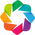

Set plot kdims to ['LM', 'LM_p']; pass kdims = [dim1,dim2] for more control.


In [6]:
# See the docs for more, 
# https://epsproc.readthedocs.io/en/dev/methods/density_mat_notes_demo_300821.html

# Import routines for density calculation and plotting
from epsproc.calc import density

#*** Compose density matrix

# Set dimensions/state vector/representation
# These must be in original data, but will be restacked as 
# necessary to define the effective basis space.

# Set dimensions for density matrix. Note stacked dims are OK, in this case LM = {l,m}
denDims = 'LM'  
selDims = None  # Select on any other dimensions?
sumDims = None  # Sum over any other dimensions? 
                # (Set sumDims=True to sum over all dims except denDims.)
pTypes=['r','i'] # Plotting types 'r'=real, 'i'=imaginary
thres = 1e-4    # Threshold for outputs (otherwise set to zero and/or dropped from result)
normME = False  # Normalise matrix elements before computing?
normDen = 'max' # Method to normalise density matrix

# Calculate - Ref case
k = sym
matE = data.data[k]['matE'].copy()  # Set data from main class instance by key

# Normalise input matrix elements?
if normME:
    matE = matE/matE.max()

#*** Compute density matrix for given parameters
# See demo at:
#   https://epsproc.readthedocs.io/en/latest/methods/density_mat_notes_demo_300821.html
# API docs:
#   https://epsproc.readthedocs.io/en/latest/modules/epsproc.calc.density.html#epsproc.calc.density.densityCalc
daOut, *_ = density.densityCalc(matE, denDims = denDims, 
                                selDims = selDims, thres = thres)

# Renormlise output?
if normDen=='max':
    daOut = daOut/daOut.max()
elif normDen=='trace':
    # Need sym sum here to get 2D trace
    daOut = daOut/(daOut.sum('Sym').pipe(np.trace)**2)  

# Plot density matrix with Holoviews
# Note sum over 'Sym' dimension to flatten plot to (l,m) dims only.
daPlot = density.matPlot(daOut.sum('Sym'), pTypes=pTypes)

In [7]:
# Glue figure for later - real part only in this case
# Also clean up axis labels from default state labels ('LM' and 'LM_p' in this case).
glue("denMatD2hRealOnly", daPlot.select(pType='Real').opts(xlabel='L,M', ylabel="L',M'"))

:HeatMap   [LM,LM_p]   (b (comp))

```{glue:figure} denMatD2hRealOnly
---
name: "fig-denMatD2hRealOnly"
---
Example density matrix, computed from matrix elements defined purely by {glue:text}`symHarmPGmatE` symmetry. Note in this case only the real part is non-zero. Axes labels give terms $\{L,M\}$ and $\{L',M'\}$.
```

## Visualising matrix element reconstruction fidelity with density matrices

To demonstrate the use of the density matrix representation as a means to test similarity or fidelity between two sets of matrix elements, a trial set of matrix elements can be derived from the original set used above, plus random noise, and the differences in the density matrices directly computed. An example is shown in {numref}`fig-denMatD2hCompExample`; in this example up to 10\% random noise has been added to the original (input) matrix elements, and the resultant density matrix computed. The difference matrix ({numref}`fig-denMatD2hCompExample`(c)) then provides the fidelity between the original and noisy case. In testing retrieval methodologies, this type of analysis thus provides a quick means to test reconstruction results vs. known inputs. Although this case is only illustrated for real density matrices, a similar analysis can be used for the imaginary (or phase) components, thus coherences can also be quickly visualised in this manner.

% TODO: ref later sections here, and/or MF recon manuscript, Sect 4.1.5 & Fig 11.

In [8]:
#*** Set trial matrix element for comparison with the original case computed above
matE = data.data[k]['matE'].copy()

if normME:
    matE = matE/matE.max()
    
# Add random noise, +/- 10%
# Note this is applied to normalised matE
# For the normalised case this results in a standard deviation in the difference 
# density matrix elements of ~sqrt(2*(0.1^2) + 2*0.1) = 0.2
# (Derived from basic error propagation, ignoring the actual values - 
#  see https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulae.)
noise = 0.1
SD = np.sqrt(4*(noise**2))
# Set range to random values +/-1 * noise
matE_noise = matE + matE*((np.random.rand(*list(matE.shape)) - 0.5) * 2*noise)  

# Compute density matrix
daOut_noise, *_ = density.densityCalc(matE_noise, denDims = denDims, selDims = selDims, thres = thres)

# Renormlise output?
if normDen=='max':
    daOut_noise = daOut_noise/daOut_noise.max()
elif normDen=='trace':
    daOut_noise = daOut_noise/(daOut_noise.sum('Sym').pipe(np.trace)**2)
    
daPlot_noise = density.matPlot(daOut_noise.sum('Sym'), pTypes=pTypes)

# Compute differences
daDiff = daOut.sum('Sym') - daOut_noise.sum('Sym')
daDiff.name = 'Difference'
daPlotDiff = density.matPlot(daDiff, pTypes=pTypes)

print(f'Noise = {noise}, SD (approx) = {SD}')
maxDiff = daDiff.max().values
print(f'Max difference = {maxDiff}')

#*** Layout plot from Holoviews objects for real parts, with custom titles.
daLayout = (daPlot.select(pType='Real').opts(title="(a) Original", xlabel='L,M', 
                                             ylabel="L',M'") 
            + daPlot_noise.select(pType='Real').opts(title="(b) With noise", 
                xlabel='L,M', ylabel="L',M'") 
            + daPlotDiff.select(pType='Real').opts(title="(c) Difference (fidelity)", 
                xlabel='L,M', ylabel="L',M'"))

Set plot kdims to ['LM', 'LM_p']; pass kdims = [dim1,dim2] for more control.
Set plot kdims to ['LM', 'LM_p']; pass kdims = [dim1,dim2] for more control.
Noise = 0.1, SD (approx) = 0.2
Max difference = (0.28533140735502216+0j)


In [9]:
# Glue plot

# Additional formatting options for PDF vs. HTML outputs.
nCols = 1
if buildEnv == 'pdf':
    nCols = 2

# Glue layout
glue("denMatD2hCompExample",daLayout.cols(nCols).opts(hv.opts.HeatMap(cmap='coolwarm')))

# Glue values
glue("denDiffMax",round(float(maxDiff.real),3))
glue("denSD",SD)

:Layout
   .HeatMap.I   :HeatMap   [LM,LM_p]   (b (comp))
   .HeatMap.II  :HeatMap   [LM,LM_p]   (b (comp))
   .HeatMap.III :HeatMap   [LM,LM_p]   (Difference)

0.285

0.2

```{glue:figure} denMatD2hCompExample
---
name: "fig-denMatD2hCompExample"
---
Example density matrices, computed from matrix elements defined purely by {glue:text}`symHarmPGmatE` symmetry. Here the panels show (a) the original density matrix, (b) density matrix computed with +/- 10% random noise added to the original matrix elements, (c) the difference matrix, which indicates the fidelity of the noisy case relative to the original case. For normalised density matrices the 10% noise case translates to a standard deviation $\sigma\approx${glue:text}`denSD` on the differences; the maximum error in the test case as illustrated ={glue:text}`denDiffMax`.
```

(sect:theory:denmat:qutip)=
## Working with density matrices with QuTiP library functions

From the numerical density matrix, a range of other standard properties can be computed - of particular interest are likely to be various standard quantities such as the trace, Von Neuman entropy and so forth. Naturally these can be computed numerically directly from the relevant formal definitions; however, many of the fundamentals are already implemented in other libraries, and numerical representations can be passed directly to such libraries. In particular, {{ qutipFull }} implements a range of standard functions, metrics, transforms and utility functions for working with state vectors and density matrices. A brief numerical example is given below, see {{ qutipDocs }} for more possibilities.

### Convert numerical arrays to QuTiP objects

In [22]:
# Import QuTip
from qutip import *

# Wrap density matrices to QuTip objects
# Note sum('Sym') to ensure 2D matrix, and .data to pass Numpy data array only
pa = Qobj(daOut.sum('Sym').data)    # Reference continuum density matrix
pb = Qobj(daOut_noise.sum('Sym').data)  # Noisy case

# QuTip objects have data as Numpy arrays, and render as typeset matrices in a notebook
# DEBUG NOTE 22/04/23 - QuTip matrix latex output currently causing PDF build errors, so set hide output for testing.
# See https://github.com/phockett/Quantum-Metrology-with-Photoelectrons-Vol3/issues/8
if buildEnv != 'pdf':
    display(pa)
    # print(pa)

Quantum object: dims = [[25], [25]], shape = (25, 25), type = oper, isherm = True
Qobj data =
[[1.         0.         0.         0.         0.70710678 0.
  1.         0.         0.70710678 0.         0.         0.
  0.         0.         0.         0.         0.70710678 0.
  0.70710678 0.         1.         0.         0.70710678 0.
  0.70710678]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.70710678 0.
  1.         0.         0.70710678 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         

### Fidelity metric

Fidelity between two density matrices $\rho_{a},\rho_{b}$ can be defined as per Refs. {cite}`benatti2010QuantumInformationComputation, nielsen2010QuantumComputationQuantum`: 

$F(\rho_{a},\rho_{b})=\operatorname{Tr} {\sqrt {{\sqrt {\rho_{a}}}\rho_{b} {\sqrt {\rho_{a}}}}}$

This is implemented by the `fidelity` function in {{ qutipFull }}. Of note in this test case is that the resultant is close to limiting-case value of $F(\rho_{a},\rho_{b})=1$ for the test case herein, despite the added noise and some per-element disparities as shown in   {numref}`fig-denMatD2hCompExample`(c). This reflects the conceptual difference between an element-wise evaluation of the differences, vs. a formal scalar metric.

% $F(\rho,\sigma )=\left(\operatorname{tr} {\sqrt {{\sqrt {\rho }}\sigma {\sqrt {\rho }}}}\right)^{2}$
% Wiki defn. from https://en.wikipedia.org/wiki/Fidelity_of_quantum_states
% Cite nielsen2010QuantumComputationQuantum

In [11]:
# Test fidelity, =1 if trace-normalised
print(f"Fidelity (a,a) = {fidelity(pa,pa)}")
print(f"Trace = {pa.tr()}")
print(f"Trace-normed fidelity = {fidelity(pa,pa)/pa.tr()}")

Fidelity (a,a) = 25.00000031332397
Trace = 25.0
Trace-normed fidelity = 1.0000000125329587


In [12]:
# Test fidelity vs noisy case
print(f"Fidelity (a,b) = {fidelity(pa,pb)}")
print(f"Trace a = {pa.tr()}, Trace b = {pb.tr()}")
print(f"Trace-normed fidelity = {fidelity(pa/pa.tr(),pb/pb.tr())}")

Fidelity (a,b) = 23.399835805413854
Trace a = 25.0, Trace b = 21.970058188419163
Trace-normed fidelity = 0.9984576780569618


In [13]:
# This can also be computed rapidly with lower-level QuTip functionality...

# Compute inner term, note .sqrtm() for square root.
inner = pa.sqrtm() * pa * pa.sqrtm()

# Compute fidelity
inner.sqrtm().tr()

(25.00000059788841+8.879641550582872e-08j)

### Von Neuman entropy
Not sure if this is interesting as yet... see S3.1 in benatti2010QuantumInformationComputation

In [14]:
entropy_vn(pa/pa.tr())

1.997852704412428

In [15]:
entropy_vn(pb/pb.tr())

2.0086551026505552

In [16]:
entropy_vn(pa/pa.tr()) - entropy_vn(pb/pb.tr())

-0.010802398238127342

### Relative entropy

Not sure if this is interesting as yet... see S3.2 in benatti2010QuantumInformationComputation

inf for (A,B) case here?

In [17]:
entropy_relative(pa/pa.tr(),pa/pa.tr())  # Indentical case = 0

0

In [18]:
entropy_relative(pa/pa.tr(),pb/pb.tr())

inf